# Dealing with Outliers

Sometimes outliers can mess up an analysis; you usually don't want a handful of data points to skew the overall results. Let's revisit our example of income data, with some random billionaire thrown in:

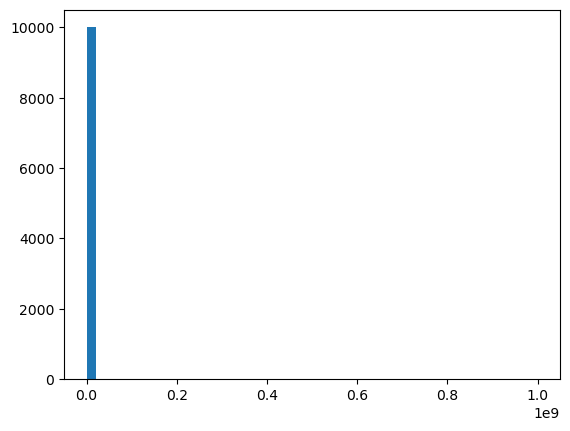

In [1]:
%matplotlib inline
import numpy as np

incomes = np.random.normal(27000, 15000, 10000)
incomes = np.append(incomes, [1000000000])

import matplotlib.pyplot as plt
plt.hist(incomes, 50)
plt.show()

That's not very helpful to look at. One billionaire ended up squeezing everybody else into a single line in my histogram. Plus it skewed my mean income significantly:

In [2]:
incomes.mean()

127080.99147164902

It's important to dig into what is causing your outliers, and understand where they are coming from. You also need to think about whether removing them is a valid thing to do, given the spirit of what it is you're trying to analyze. If I know I want to understand more about the incomes of "typical Americans", filtering out billionaires seems like a legitimate thing to do.

Here's something a little more robust than filtering out billionaires - it filters out anything beyond two standard deviations of the median value in the data set:

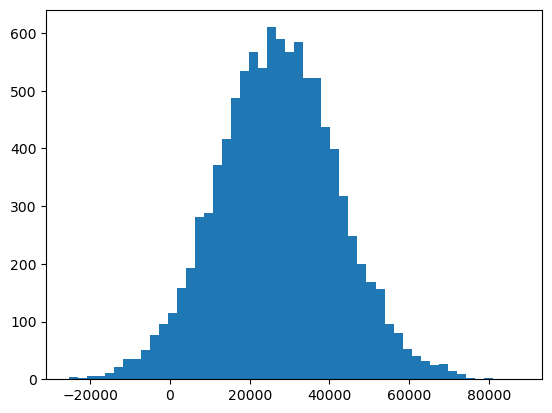

In [3]:
def reject_outliers(data):
    u = np.median(data)
    s = np.std(data)
    filtered = [e for e in data if (u - 2 * s < e < u + 2 * s)]
    return filtered

filtered = reject_outliers(incomes)

plt.hist(filtered, 50)
plt.show()

That looks better. And, our mean is more, well, meangingful now as well:

In [4]:
np.mean(filtered)

27093.69957079618

## Activity

Instead of a single outlier, add several randomly-generated outliers to the data. Experiment with different values of the multiple of the standard deviation to identify outliers, and see what effect it has on the final results.

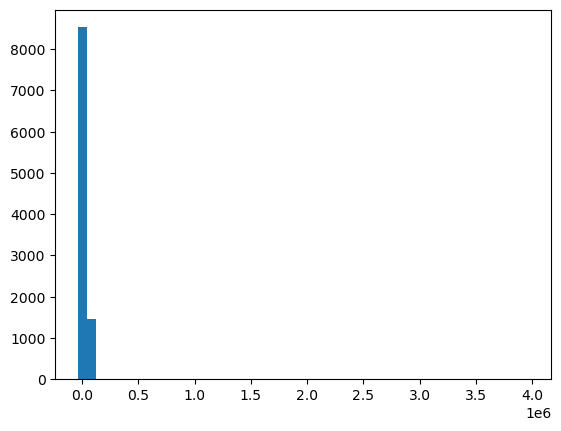

In [9]:
incomes = np.random.normal(27000, 15000, 10000)
threshold = 3 #numero de desv padroes de deslocamente da media para caracterizar um outlier

for i in range(10):
    outlier = 0
    std = np.std(incomes)
    u = np.mean(incomes)
    if np.random.randint(0,1,1): #50% de chance de entrar nesse bloco
        outlier = np.random.randint(0, u - threshold*std, 1)
        incomes = np.append(incomes, [outlier])
        #adiciona um outlier à esquerda em incomes
    else: #tambem 50% de chance de entrar nesse bloco
        outlier = np.random.randint(u + threshold*std, u + 100*std)
        incomes = np.append(incomes, [outlier])
        #adiciona um outlier à direita (de até 100x o desvio padrao)
plt.hist(incomes, 50)
plt.show()

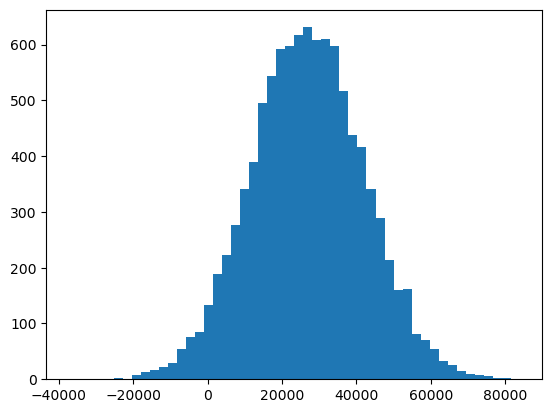

In [12]:
#utilizando o limite para ser outlier em 3x o desv padrao
def reject_outliers(data):
    u = np.mean(data)
    s = np.std(data)
    filtered = [e for e in data if (u - threshold*std < e < u + threshold*std)]
    return filtered

filtered = reject_outliers(incomes)
plt.hist(filtered, 50)
plt.show()

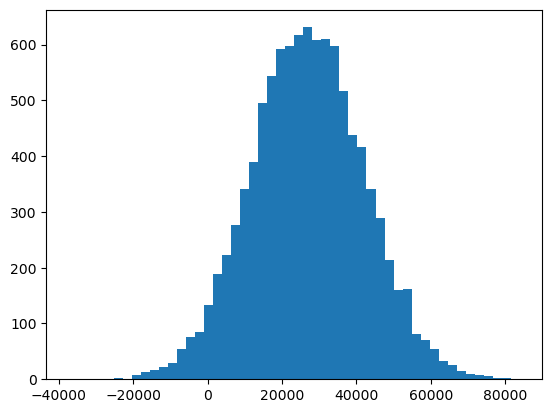

In [17]:
#utilizando o limite para ser outlier em 5x o desv padrao
threshold = 7
def reject_outliers(data):
    u = np.mean(data)
    s = np.std(data)
    filtered = [e for e in data if (u - threshold*std < e < u + threshold*std)]
    return filtered

filtered = reject_outliers(incomes)
plt.hist(filtered, 50)
plt.show()

Não muda muito.

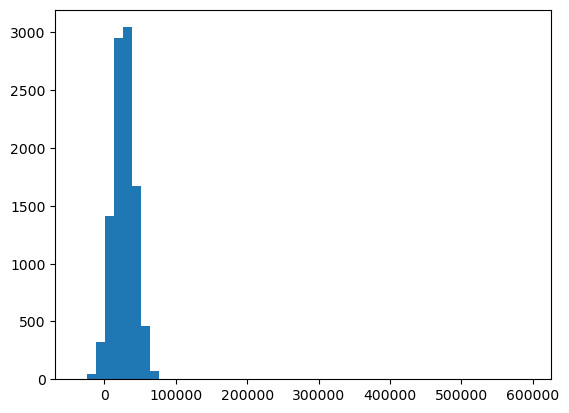

In [18]:
#utilizando o limite para ser outlier em 8x o desv padrao
threshold = 8
def reject_outliers(data):
    u = np.mean(data)
    s = np.std(data)
    filtered = [e for e in data if (u - threshold*std < e < u + threshold*std)]
    return filtered

filtered = reject_outliers(incomes)
plt.hist(filtered, 50)
plt.show()

Em 8 já se apresenta a distorção à esquerda dos dados. Ou seja, para esse conjunto de dados, o ideal é se ter o limite de 7 desvios padrões de deslocamente da média para ser outlier, o que mantém o máximo dos dados originais e gera uma distribuição esperada (a normal, neste caso).